In [1]:
import numpy as np
from matplotlib import pyplot as plt
import types
import scipy.integrate as sp

In [2]:
#CI :
#0.7905694148874 energy value for n=0 in harmonic potential

x_m , x_M = -10 , 10  #limites du domaine d'intégration
psi_x_m , psi_x_M = 0 , 0  #valeurs de la fonction d'onde aux limites

#potentiel
V_0 = 5
a = 2
def V (x):
    #square well
    return -V_0/2*(1-np.sign(np.abs(x)-a))


b = 2
#def V_2 (x):
    #quadratic well
 #   return V_0/2*((x/b)**2-1)*(1-np.sign(np.abs(x)-b))

#params d'intégration
dx = 0.01
eps = 10**(-7)

In [3]:
def normalization(psi, x):
    norm = sp.simps(abs(psi)**2,x)
    return psi/np.sqrt(norm)

In [4]:
def check_orthogonality(psi_array, x):
    return sp.simps(normalization(psi_array[0], x)*normalization(psi_array[1], x), x)

In [5]:
def numerov(psi_range,x_range,V,E,direction):
    """psi_range = array contenant les psi_i avec les valeurs aux bords déjà mises en place 
    x_range = array contenant les x
    V = fonction jouant le role de potentiel
    E = energie à tester
    direction -> 1 = gauche/droite  -1=droite/gauche"""
    
    #création de variables utiles
    Q = lambda x : 2*(E-V(x))
    h = x_range[1]-x_range[0]  
    psi_out = psi_range.copy()
    
    #réalisation de l'intégration de Numerov
    if direction == 1 :
        for i in range(2,len(psi_range)):
            psi_out[i] = (2*(1-5/12*h**2*Q(x_range[i-1]))*psi_out[i-1]-(1+1/12*h**2*Q(x_range[i-2]))*psi_out[i-2])/(1+1/12*h**2*Q(x_range[i]))
    if direction == -1 :
        for i in range(len(psi_range)-3,-1,-1):
            psi_out[i] = (2*(1-5/12*h**2*Q(x_range[i+1]))*psi_out[i+1]-(1+1/12*h**2*Q(x_range[i+2]))*psi_out[i+2])/(1+1/12*h**2*Q(x_range[i]))
    
    return psi_out

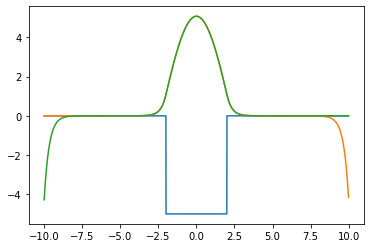

In [6]:
x_range = np.linspace(x_m,x_M,int((x_M-x_m)/dx))

psi_range = np.zeros(int((x_M-x_m)/dx))
#mise en place des conditions aux bords
psi_range[0] = psi_x_m
psi_range[1] = psi_x_m + eps
psi_range[-1] = psi_x_M
psi_range[-2] = psi_x_M + eps

#variables pour l'affichage
temp = -1
normalisation = 80000

#plot le potentiel
plt.plot(x_range[0:temp],V(x_range[0:temp]))

#E = -2.9786753325
E = -4.7707349324
#E = - 4.77073493


#plot l'intégration de gauche à droite
out = numerov(psi_range,x_range,V,E,1)
plt.plot(x_range[0:temp],out[0:temp]/normalisation)

#plot l'intégration de droite à gauche
out_2 = numerov(psi_range,x_range,V,E,-1)
plt.plot(x_range[0:temp],out_2[0:temp]/normalisation)
#plt.xlim(-5,5)
#plt.ylim(0,0.2)
#plt.yscale('log')

In [7]:
def Do_mid_point (psi_range,x_range,V,E,N_x_c):
    """psi_range = array contenant les psi_i avec les valeurs aux bords déjà mises en place 
    x_range = array contenant les x
    V = fonction jouant le role de potentiel
    E = energie à tester
    N_x_c = indice du mid-point"""
    
    h = x_range[1]-x_range[0]
    
    #découpage des ranges au mid-point
    x_left = x_range.copy()[0:N_x_c+1]
    x_right = x_range.copy()[N_x_c:] 
    
    psi_left = psi_range.copy()[0:N_x_c+1]
    psi_right = psi_range.copy()[N_x_c:]
    
    
    #réalisation des intégrations de numerov
    psi_left = numerov(psi_left,x_left,V,E,1)
    psi_right = numerov(psi_right,x_right,V,E,-1)
    
    #raccordement des deux morceaux :
    psi_out = np.concatenate((psi_left[0:-1],psi_right*(psi_left[-1]/psi_right[0])))
    
    #évaluation de l'erreur du raccord en x_c
    log_error = (psi_left[-1]-psi_left[-2])/(psi_left[-1]*h) - (psi_right[1]-psi_right[0])/(psi_right[0]*h)

    N = 0
    
    for i in range(1,len(psi_out)) :
        if (psi_out[i]*psi_out[i-1] < 0):
            N += 1
    
    return log_error, N , psi_out

log_error : 13.763984038814886 | N : 4


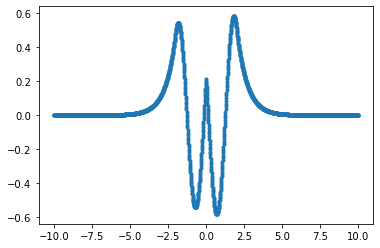

In [8]:
x_range = np.linspace(x_m,x_M,int((x_M-x_m)/dx))

psi_range = np.zeros(int((x_M-x_m)/dx))
psi_range[0] = psi_x_m
psi_range[1] = psi_x_m + eps
psi_range[-1] = psi_x_M
psi_range[-2] = psi_x_M + eps

N_x_c = int(len(psi_range)/2)

#E=-4.091
#E = -2.9786753325
E = -1.1

#E = - 4.770734932405
energy = [- 4.770734932405, -4.091, -2.9786753325, -1.1]
log_error , N , psi_out = Do_mid_point(psi_range,x_range,V,E,N_x_c)
print("log_error :" ,log_error,"| N :",N)
plt.plot(x_range,psi_out, '.')
psi_out1 = psi_out 


Overlap integral:-0.2891220455064353


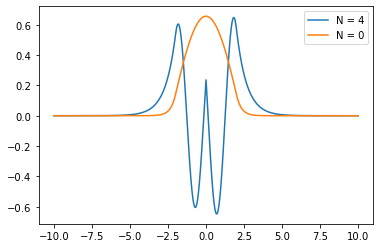

Overlap integral:0.35037608043369095


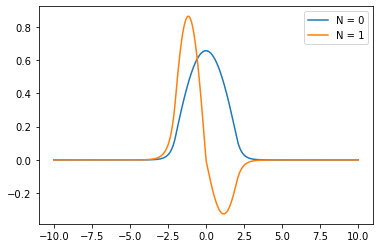

Overlap integral:0.21025792755559541


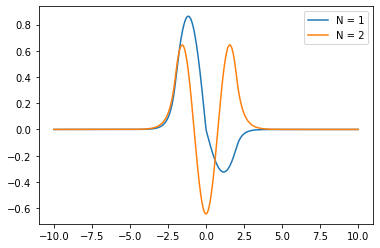

Overlap integral:0.5547437372791812


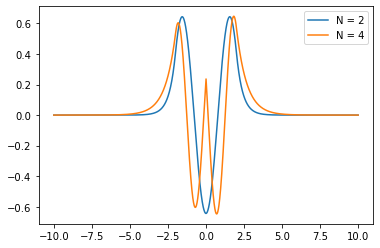

In [9]:
for i in range(0, len(energy)):
    # check orthogonality
    log_error , N1 , psi_out1 = Do_mid_point(psi_range,x_range,V,energy[i-1],N_x_c)
    log_error , N2 , psi_out2 = Do_mid_point(psi_range,x_range,V,energy[i],N_x_c)
    psi_array = [psi_out1, psi_out2]
    print("Overlap integral:" + str(check_orthogonality(psi_array, x_range)))
    # plot wavefunction overlap
    plt.figure()
    plt.plot(x_range, normalization(psi_out1, x_range))
    plt.plot(x_range, normalization(psi_out2, x_range))
    plt.legend(['N = ' + str(N1), 'N = ' + str(N2)])
    plt.show()

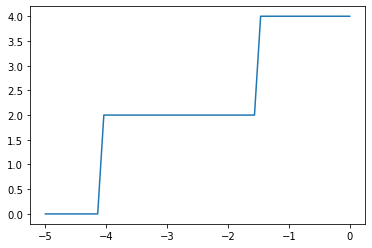

In [32]:
#analyse du comportement de N
x_range = np.linspace(x_m,x_M,int((x_M-x_m)/dx))

psi_range = np.zeros(int((x_M-x_m)/dx))
psi_range[0] = psi_x_m
psi_range[1] = psi_x_m + eps
psi_range[-1] = psi_x_M
psi_range[-2] = psi_x_M + eps

k=10**2

N_x_c = int(len(psi_range)/2)
E_arr = np.linspace(-V_0,0,k)
N_arr = np.zeros(len(E_arr))

for i in range(len(E_arr)):
    log_error , N_arr[i] , psi_out = Do_mid_point(psi_range,x_range,V,E_arr[i],N_x_c)
    
plt.plot(E_arr,N_arr)

In [33]:
def find_change(E_arr,N_arr):
    #find where and how much the nodes (N_arr) changes w.r.t E_arr
    data = []
    for i in range(0,len(E_arr)-1) :
        if N_arr[i+1]-N_arr[i] > 0 :
            data.append((i,N_arr[i+1]-N_arr[i]))
    return data


In [34]:
find_change(E_arr,N_arr)

[(17, 1.0), (18, 1.0), (68, 1.0), (69, 1.0)]

In [35]:
def slice_E_arr(psi_range,x_range,V,E_arr,N_x_c,slices,temp_slices,remove_borders = False):
    N_arr = np.zeros(len(E_arr))
    for i in range(len(E_arr)):
        log_error , N_arr[i] , psi_out = Do_mid_point(psi_range,x_range,V,E_arr[i],N_x_c)
    E_crit = find_change(E_arr,N_arr)
    
    if (not remove_borders):
        slices.append(( [ E_arr[0] , E_arr[E_crit[0][0]+2] ] ,N_arr[E_crit[0][0]]))
        if E_crit[0][1] > 1 :
            temp_slices.append([ E_arr[E_crit[0][0]] , E_arr[E_crit[0][0]+2] ])
    
    for i in range(1,len(E_crit)) :
        slices.append(( [ E_arr[E_crit[i-1][0]] , E_arr[E_crit[i][0]+2] ] ,N_arr[E_crit[i][0]]))
        if E_crit[i][1] > 1 :
            temp_slices.append([ E_arr[E_crit[i][0]] , E_arr[E_crit[i][0]+2] ])

    if (not remove_borders):
        slices.append(( [ E_arr[E_crit[-1][0]] , E_arr[-1]],N_arr[-1]))


In [36]:
slices = []
temp_slices = []
slice_E_arr(psi_range,x_range,V,E_arr,N_x_c,slices,temp_slices)
slices

[([-5.0, -4.040404040404041], 0.0),
 ([-4.141414141414142, -3.9898989898989896], 1.0),
 ([-4.090909090909091, -1.4646464646464645], 2.0),
 ([-1.5656565656565657, -1.4141414141414144], 3.0),
 ([-1.5151515151515151, 0.0], 4.0)]

In [37]:
def find_E_N(psi_range,x_range,V,E_min,E_max,N_x_c,N):
    
    log_error , N_arr[i] , psi_out = Do_mid_point(psi_range,x_range,V,E_arr[i],N_x_c)

In [38]:
def resolution(V,E_min,E_max,x_m,x_M,N_x_c=-1,dx=-1,eps=10**-5):
    ##--------------------------------------------------------------
    #checking the validity of the arguments
    args_ok = isinstance(V, types.FunctionType) and (E_min < E_max) and (x_m < x_M)
    if (not args_ok) :
        print('arguments are not valid')
        return 0
    
    
    ##--------------------------------------------------------------
    #creation of the initialisations sets.
    if dx == -1 : dx = (x_M-x_m)/100
    
    x_range = np.linspace(x_m,x_M,int((x_M-x_m)/dx))

    psi_range = np.zeros(int((x_M-x_m)/dx))
    psi_range[0] = psi_x_m
    psi_range[1] = psi_x_m + eps
    psi_range[-1] = psi_x_M
    psi_range[-2] = psi_x_M + eps
    
    if N_x_c == -1 : N_x_c = int(len(psi_range)/2)
    
    
    ##--------------------------------------------------------------
    #slicing [E_min,E_max] in arrays with constant number of nodes.
    
    slices = [] #array containing (slice,N in slice)
    temp_slices = [] #array containing the slices that still needs to be processed
    
    #first search of energy where the number of nodes changes  
    k=10**1 #number of test points for the first search
    E_arr = np.linspace(E_min,E_max,k)
    
    slice_E_arr(psi_range,x_range,V,E_arr,N_x_c,slices,temp_slices)
    
    while (len(temp_slices) != 0):
        for slc in temp_slices:
            E_arr = np.linspace(slc[0],slc[-1],k)
            temp_slices.pop(0)
            slice_E_arr(psi_range,x_range,V,E_arr,N_x_c,slices,temp_slices,remove_borders = True)
    
    return slices

In [39]:
resolution(V,-V_0,0,x_m,x_M,N_x_c=-1,dx=-1,eps=10**-5)

[([-5.0, -3.333333333333333], 0.0),
 ([-4.444444444444445, -1.1111111111111107], 2.0),
 ([-2.2222222222222223, -0.5555555555555554], 3.0),
 ([-1.6666666666666665, 0.0], 4.0),
 ([-4.197530864197531, -3.8271604938271606], 1.0)]